In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import animation
from matplotlib import patches 
from matplotlib import colors 
from matplotlib import cm

In [2]:
wavelengths_list_of_list = []
intensities_list_of_list = []
for n in range(0,20,1):
    print(n)
    spectra_n = pd.read_csv('../Fibre Design/Single Shot Data/24_01_23/Spectra/nath_24_01_23_{}.CSV'.format(n), skiprows=39, names=['Wavelength', 'Intensity'])
    wavelengths_list_of_list.append(spectra_n.Wavelength.to_numpy())
    intensities_list_of_list.append(spectra_n.Intensity.to_numpy())


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


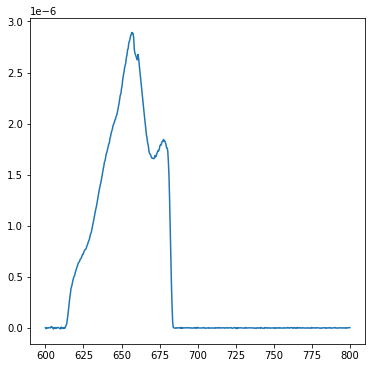

In [4]:
fig_spectra = plt.figure(figsize=(6,6))
ax_spectra = fig_spectra.add_subplot(111)

ax_spectra.plot(spectra_n['Wavelength'], spectra_n['Intensity'])

plt.show()

In [27]:
def make_video(wavelength_list, intensities_list, fname, frame_no):
    fig = plt.figure()
    fig.set_dpi(400)
    fig.set_size_inches(6, 5)

    ax = plt.axes(xlim=(600, 800), ylim=(np.min(intensities_list), np.max(intensities_list)+1e-6))

    def init():
        ax.plot(wavelength_list[0], intensities_list[0])
        ax.set_title('0 Rotations')
        ax.set_xlabel('Wavelength (nm)')
        ax.set_ylabel('Intensity (arb)')

    def animate(i):
        ax.clear()
        # ax = plt.axes(xlim=(500, 800), ylim=(min(intensities_list), max(intensities_list)))
        ax.plot(wavelength_list[i], intensities_list[i])
        ax.set_title('{} Rotations'.format(i))
        ax.set_xlim([600, 800])
        ax.set_ylim([np.min(intensities_list), np.max(intensities_list)+1e-6])
        ax.set_xlabel('Wavelength (nm)')
        ax.set_ylabel('Intensity (arb)')

    anim = animation.FuncAnimation(fig, animate, 
                                init_func=init, 
                                frames=frame_no, 
                                interval=3000,
                                blit=False,
                                save_count=frame_no,
                                repeat=True)
    writervideo = animation.FFMpegWriter(fps=1)
    
    plt.axis('off')
    anim.save('../Propagation Videos/'+fname, writer=writervideo)
    
    plt.close()
    return 

In [28]:
make_video(wavelengths_list_of_list, intensities_list_of_list, 'spectra_change_24_01.mp4', 20)